# Part 1 ‑ Exploratory Data Analysis

Instructions:

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

1. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

2. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

We use pandas and numpy to analyze our data. We use seaborn with matplotlib to visualize our data.

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load json file into pandas dataframe
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


We do a quick check on the description on the dataframe.

In [3]:
# Checking dataframe
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


For the dataframe information, there seems to be no missing or null values, this saves us some time!

In [4]:
# Checking dataframe
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Time to do some time series! We lockdown the 'login_time' data so we can split it into 15-min intervals.

In [5]:
# Setting the index to be 'login_time'
indexed_logins_df = logins_df.set_index(['login_time'])
indexed_logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [6]:
# Counting each 15-minute interval
indexed_logins_df['count'] = 1
indexed_logins_df_15T = indexed_logins_df.resample('15T').count()
indexed_logins_df_15T = indexed_logins_df_15T.reset_index()
indexed_logins_df_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


**NOTE: We have 3.5 months of data; April is missing 2 weeks of data.**

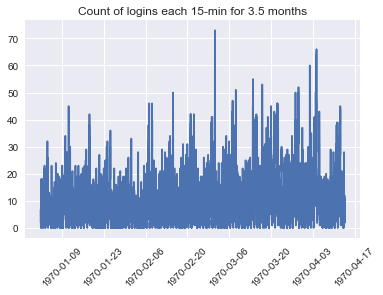

In [7]:
# All 3.5 months
x = indexed_logins_df_15T['login_time']
y = indexed_logins_df_15T['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for 3.5 months')
plt.xticks(rotation=45);

**There seems to be regular spikes, let's try to look into that. I'm suspecting the trend to be related to weekends. But first, let's look at each month.**

Let's make tables for each month

In [8]:
jan = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-01')
                           & (indexed_logins_df_15T.login_time < '1970-02')]
feb = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-02')
                           & (indexed_logins_df_15T.login_time < '1970-03')]
mar = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-03')
                           & (indexed_logins_df_15T.login_time < '1970-04')]
apr = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-04')
                           & (indexed_logins_df_15T.login_time < '1970-05')]

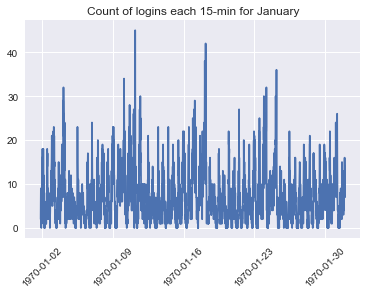

In [9]:
# January
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for January')
plt.xticks(rotation=45);

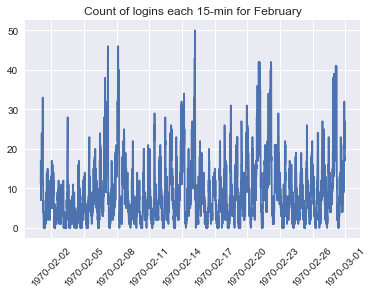

In [10]:
# February
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for February')
plt.xticks(rotation=45);

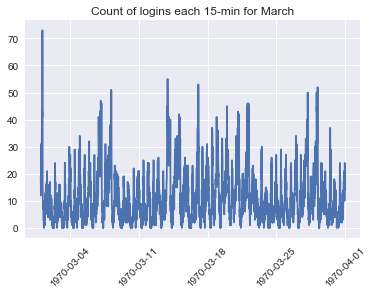

In [11]:
# March
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for March')
plt.xticks(rotation=45);

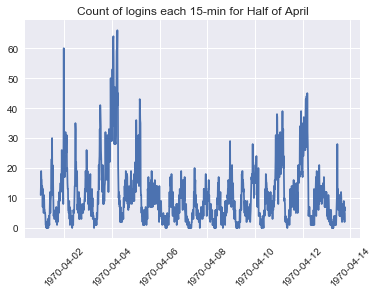

In [12]:
# April
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for Half of April')
plt.xticks(rotation=45);

**After looking at the 3.5 months of available data, there seems to be no trend for weekly logins per month. Let's dive deeper into each week.**

In [13]:
# Counting based on weekdays, 0 = Monday, 6 = Sunday
indexed_logins_df_15T['weekday'] = indexed_logins_df_15T[
    'login_time'].dt.dayofweek
wkday = indexed_logins_df_15T.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [14]:
# Giving names for the weekdays
wkday_count['weekday'] = ['Mon', 'Tues', 'Wed','Thurs',
                          'Fri', 'Sat', 'Sun']
wkday_count = wkday_count[['weekday', 'count']]
wkday_count

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


**There seems to be a trend here! Amount of logins increase as we near the weekend.**

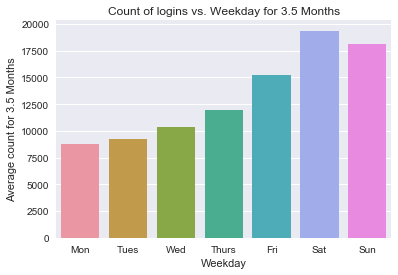

In [15]:
# Visualizing count of logins vs. weekday
sns.barplot(x='weekday', y='count', data=wkday_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Weekday')
plt.title('Count of logins vs. Weekday for 3.5 Months')

Now we drop a step deeper from days to hours. (Don't worry, we'll go back to 15-min intervals as instructions command)

In [16]:
# Splitting into hours
indexed_logins_df_15T['hour'] = indexed_logins_df_15T[
    'login_time'].dt.hour
hours = indexed_logins_df_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()
hour.head()

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


**Here, it seems like user logins increase during lunch time (11- am to noon), and during late-night (9 pm - 4 am)**

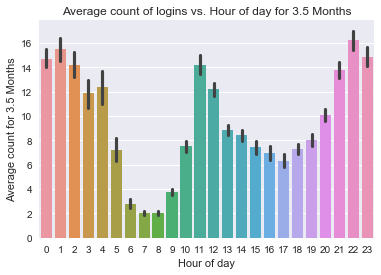

In [17]:
# Visualizing count of logins per hour of the day
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of day for 3.5 Months')

Now, we go back to 15-minute splits. Let's see if we can make sense out of this.

In [18]:
# Splitting into 15 minute intervals
indexed_logins_df_15T['15_minute'] = indexed_logins_df_15T[
    'login_time'].dt.minute
minutes = indexed_logins_df_15T
minute = minutes[['count', '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
minute

,15_minute,count
0,0,22660
1,15,22975
2,30,23962
3,45,23545


**The averages here seem to be stable, nothing meaningful here**

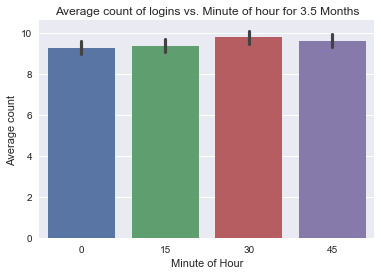

In [19]:
# Visualizing count of logins per quarter-hour
sns.barplot(x='15_minute', y='count', data=minutes)
plt.ylabel('Average count')
plt.xlabel('Minute of Hour')
plt.title('Average count of logins vs. Minute of hour for 3.5 Months')

## Conclusion for Part 1

1. Amount of user-logins increase and peak torwards the weekend.
2. Amount of user-logins increase during lunch time (11- am to noon) and during late-night (9 pm - 4 am)

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment.
    * what statistical test(s) you will conduct to verify the significance of the observation.
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Solution:

First, we talk about why the Ultimate managers want more driver partners to be available in both cities.

* To increase driver/rider acceptance-rates
* To increase driver/rider sign-ups
* To reduce driver/rider wait times
* To increase profit

Ultimately, increasing acceptance-rates and sign-ups while reducing wait times would lead to profit. (No pun intended) In order to increase profit, the additional income brought in during the experiment must outweigh the toll cost reimbursements. We would use the key metric of profit after reimbursement. 

There are two tests that we could do depending on the time and budget available. A simple study could be an A/B study. We would randomly select half of the drivers to participate in the study while we leave out the other half. After a few months, we compare the profit made after reimbursement of toll costs. A more robust study could last a year. All driver partners are included in the study and the profit made for the year is compared to the previous years with time series analysis.

After getting our results, we would use a t-test to test for significance (p = 0.05) between each group. 

The results of this experiment all depend on what we started it for. An increase in profits. If profits decreased after the experiment, it would mean that reimbursement of toll fees may not have been the most effective way to encourage drivers to be active in both cities in order to increase profits. There may have been exploitations of the incentive or worse. If profits stay the same, then the feature should be left intact due to the possible convenience to some drivers. Finally, if profits increase, it could mean that more experiments relating reimbursements such as gas or mileage will increase profits even further.

# Part 3: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

    2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

    3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).
    
### Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

### Data cleaning

In [20]:
# Import json and read data into dataframe
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
# Getting description of each feature
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [22]:
# Checking datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


As seen above, we have some missing values. Since it is a very small percentage of missing data, we'll assume it with the average values of the entire sample.

In [23]:
# Impute in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

50,000 values for all features. Perfect!

In [24]:
# Checking datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
# Convert objects to dates
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Data Visualization

The purpose of data visualization here is to simply visualize data distribution. If our model depends on a certain feature to increase retention rate, we look back at our visualizations to see if improvements could be made or not.

The most interesting feature availible for us to use is 'trips in first 30 days'. Let's see the relationship it has with other features.

In [26]:
# Create dataframe for city and trips
trips_city = (df[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


**Winterfell is the most popular city**

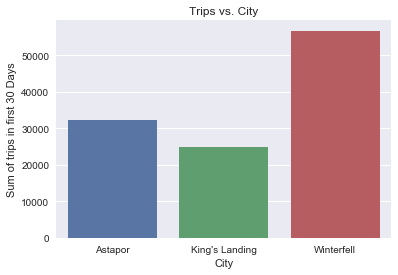

In [27]:
# Constructing barplot
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')

In [28]:
# Create dataframe for phone and trips
trips_phone= df[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


**iPhone users take the most trips**

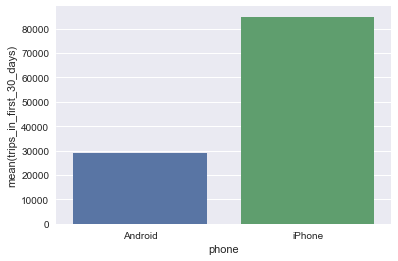

In [29]:
# Constructing barplot
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)

Now, we construct a 6-month retention parameter for our dataset. If the user has taken a trip in 6-months before our last recorded data point, they are considered a retained user.

In [30]:
# Getting last trip date recorded
df[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

In [31]:
# Active users
len(df[df['last_trip_date'] >= '2014-06-01'])

18804

In [32]:
# Non-active users
len(df[df['last_trip_date'] < '2014-06-01'])

31196

In [33]:
# Total users
len(df)

50000

In [34]:
# Entering the new parameters
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [35]:
# Retained users
df['retained'].sum()/len(df)

0.37608

## Data Preprocessing

In [36]:
# Dropping date-time features for predictive modeling
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

In [37]:
# Saving 'retained' values for later
y = df['retained'].values

In [38]:
# Dropping 'retained' values
df = df.drop('retained', axis=1)
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.700000,1.10,King's Landing,iPhone,15.4,4,True,46.2
1,8.26,5.0,5.000000,1.00,Astapor,Android,0.0,0,False,50.0
2,0.77,5.0,4.300000,1.00,Astapor,iPhone,0.0,3,False,100.0
3,2.36,4.9,4.600000,1.14,King's Landing,iPhone,20.0,9,True,80.0
4,3.13,4.9,4.400000,1.19,Winterfell,Android,11.8,14,False,82.4
5,10.56,5.0,3.500000,1.00,Winterfell,iPhone,0.0,2,True,100.0
6,3.95,4.0,4.601559,1.00,Astapor,Android,0.0,1,False,100.0
7,2.04,5.0,5.000000,1.00,Winterfell,iPhone,0.0,2,False,100.0
8,4.36,5.0,4.500000,1.00,Winterfell,Android,0.0,2,False,100.0
9,2.37,5.0,4.601559,1.00,Winterfell,Android,0.0,1,False,0.0


Here we do hot encoding for our object variables. We give them different columns since an option in one feature isn't necessarily better than the other.

In [39]:
# One-hot-encode all categorical features
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [40]:
# Checking up on our new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [41]:
# Setting X set into values
X = df_encoded.values

In [42]:
# Quick check on first line of X
X[0]

array([  3.67,   5.  ,   4.7 ,   1.1 ,  15.4 ,   4.  ,  46.2 ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ])

In [43]:
# Quick check on first line of y
y[0]

1.0

Now we split the datasets into traning and test set, 80% of our data will be used to train our model and 20% will be used to test our model.

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Since we will be using intensive neural networks, we will scale our features to make it easier on our deep learning processing stages.

In [45]:
# First row of training set before feature scaling
X_train[0]

array([  4.22,   4.8 ,   4.4 ,   1.  ,   0.  ,   8.  ,  58.8 ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  ])

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# First row of training set after feature scaling
X_train[0]

array([-0.27614115,  0.0499192 , -0.35772305, -0.33433449, -0.44316453,
        1.50137864, -0.05730248, -0.70371536, -0.5019914 ,  1.06720338,
       -0.65134309,  0.65134309,  0.78254911, -0.78254911])

### Developing Neural Network for Predictive Model

We start development of our neural network with TensorFlow and Keras. The Sequential package will be used to initalize our neural network. The Dense package will be used to layer our neural network.

In [48]:
# Importing TensorFlow and the Keras libraries with packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Time to initialize our neural network!

In [49]:
# Initializing the Neural Network
classifier = Sequential()

We add our first layer which takes 14 inputs and has 7 neurons. Generally, we pick a neuron count which is averaged between input (11) and output (1) counts. We use a rectifier(general) activation function for our middle layers and a sigmoid (probablity) function for our final output.

In [50]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

To compile our neural network, we use an 'Adam' optimizer, an excellent algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. We use a log loss function, binary crossentropy. since it works well with our sigmoid function. Our metrics will be accuracy since that is what we are most concerned about for our model.

In [51]:
# Compiling the Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

To fit our neural network to our training set, we use a batch size of 16 and 10 epochs.

In [52]:
# Fitting the Neural Network to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
40000/40000 [==============================] - 2s - loss: 0.5487 - acc: 0.7252     
Epoch 2/10
40000/40000 [==============================] - 2s - loss: 0.5048 - acc: 0.7573     
Epoch 3/10
40000/40000 [==============================] - 2s - loss: 0.4931 - acc: 0.7678     
Epoch 4/10
40000/40000 [==============================] - 2s - loss: 0.4904 - acc: 0.7693     
Epoch 5/10
40000/40000 [==============================] - 2s - loss: 0.4890 - acc: 0.7707     
Epoch 6/10
40000/40000 [==============================] - 2s - loss: 0.4879 - acc: 0.7715     
Epoch 7/10
40000/40000 [==============================] - 2s - loss: 0.4869 - acc: 0.7723     
Epoch 8/10
40000/40000 [==============================] - 2s - loss: 0.4862 - acc: 0.7724     
Epoch 9/10
40000/40000 [==============================] - 2s - loss: 0.4858 - acc: 0.7735     
Epoch 10/10
40000/40000 [==============================] - 2s - loss: 0.4854 - acc: 0.7730     


**Our model has an 77.15% accuracy, nice! There are still some improvements to be made.**

### Making Predictions and Evaluating the Model

Since we are predicting retention rate, we will use above 50% to be 'True'. We should use a higher threshold for more sensitive studies such as medical ones. After, we print a confusion matrix to see our results.

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5271  980]
 [1260 2489]]


In [54]:
# Visualizing confusion matrix
pos, neg = cm
tp, fp = pos
fn, tn = neg
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

True Positives: 5271
True Negatives: 2489
False Positives: 980
False Negatives: 1260


In [55]:
# Accuracy rate of confusion matrix
print('Accuracy:', (tp+tn)/(tp+tn+fp+fn))

Accuracy: 0.776


### Test Neural Network Model

Here we test our neural network predicting feature with an example user.

In [56]:
ex_user = pd.DataFrame([0.77, 5., 4.3, 1., 0., 3., 100.,
          1., 0., 0., 0., 1., 1., 0.])
ex_user = ex_user.T
ex_user.columns = df_encoded.columns
ex_user

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.77,5.0,4.3,1.0,0.0,3.0,100.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


So, with the following features, the user will not retain after 6 months at 10.38% chance of retaining.

In [57]:
# Making prediction for given values
new_prediction = classifier.predict(
    sc.transform(np.array(ex_user.values)))
new_prediction_tf = (new_prediction > 0.5)
print('Customer will retain:', new_prediction_tf, new_prediction)

Customer will retain: [[False]] [[ 0.1423932]]


### Evaluating and Tuning the Neural Network

#### Evaluating the Neural Network
What is new now is that we will use k-fold cross validation to improve our test set accuracy. To do this, we use scikit-learn's cross val score. We also use keras.wrappers to wrap scikit learn around keras.

In [58]:
# Importing packages and building new classifer with cross validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [59]:
# Fitting Neural Network to Training set and getting accuracies
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 16, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/10
36000/36000 [==============================] - 2s - loss: 0.5502 - acc: 0.7242     
Epoch 2/10
36000/36000 [==============================] - 2s - loss: 0.5152 - acc: 0.7490     
Epoch 3/10
36000/36000 [==============================] - 2s - loss: 0.5066 - acc: 0.7568     
Epoch 4/10
36000/36000 [==============================] - 2s - loss: 0.5017 - acc: 0.7605     
Epoch 5/10
36000/36000 [==============================] - 2s - loss: 0.4964 - acc: 0.7647     
Epoch 6/10
36000/36000 [==============================] - 2s - loss: 0.4923 - acc: 0.7678     
Epoch 7/10
36000/36000 [==============================] - 2s - loss: 0.4905 - acc: 0.7701     
Epoch 8/10
36000/36000 [==============================] - 2s - loss: 0.4892 - acc: 0.7706     
Epoch 9/10
36000/36000 [==============================] - 2s - loss: 0.4886 - acc: 0.7701     
Epoch 10/10
36000/36000 [==============================] - 2s - loss: 0.5681 - acc: 0.7113     
Epoch 2/10
36000/36000 [=========================

36000/36000 [==============================] - 2s - loss: 0.5185 - acc: 0.7486     
Epoch 3/10
36000/36000 [==============================] - 2s - loss: 0.5015 - acc: 0.7621     
Epoch 4/10
36000/36000 [==============================] - 2s - loss: 0.4966 - acc: 0.7662     
Epoch 5/10
36000/36000 [==============================] - 2s - loss: 0.4938 - acc: 0.7676     
Epoch 6/10
36000/36000 [==============================] - 2s - loss: 0.4918 - acc: 0.7694     
Epoch 7/10
36000/36000 [==============================] - 2s - loss: 0.4909 - acc: 0.7699     
Epoch 8/10
36000/36000 [==============================] - 2s - loss: 0.4896 - acc: 0.7716     
Epoch 9/10
36000/36000 [==============================] - 2s - loss: 0.4887 - acc: 0.7711     
Epoch 10/10
36000/36000 [==============================] - 2s - loss: 0.5669 - acc: 0.7135     
Epoch 2/10
36000/36000 [==============================] - 2s - loss: 0.5227 - acc: 0.7507     
Epoch 3/10
36000/36000 [==============================] - 2s

In [67]:
mean = accuracies.mean()
variance = accuracies.std()
print('Average: ', ('%.4f' % mean))
print('Standard Deviation: ', ('%.4f' % variance))

Average:  0.7720
Standard Deviation:  0.0078


### Tuning the Neural Network

To finally tune our neural network, we use grid search to tune our hyper parameters such as batch size and epochs.

In [60]:
# Importing packages and building new classifer with grid search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [61]:
# Building our Neural Network with empty optimizer, batch size, and epochs
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

In [62]:
# Parameters for batch size, epochs, and optimizer functions
parameters = {'batch_size': [16, 32],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}

In [63]:
# Setting up Grid Search
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)
# grid_search = grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

In [64]:
# Getting our best parameters
# best_parameters

In [65]:
# Getting our best average
# print('Best average: ', ('%.4f' % best_accuracy))

In [66]:
retained = pd.DataFrame(y)
retained.columns = ['retained']
pd.concat([df_encoded, retained],
          axis=1).corr().iloc[14].sort_values(
    ascending=False)

retained                     1.000000
city_King's Landing          0.262284
phone_iPhone                 0.225464
trips_in_first_30_days       0.210463
ultimate_black_user_True     0.205002
surge_pct                    0.011797
weekday_pct                  0.009693
avg_surge                   -0.003333
avg_rating_of_driver        -0.010829
avg_rating_by_driver        -0.026748
city_Winterfell             -0.046611
avg_dist                    -0.092780
city_Astapor                -0.174655
ultimate_black_user_False   -0.205002
phone_Android               -0.225464
Name: retained, dtype: float64

## Conclusion

The features most correlated to retention are: Users in King's landing, iPhone users, and high trips in first 30 days. 

In order for Ultimate to further improve retention rates, they should look into what is different in King's landing compared to other cities. They should also test usability between iPhone and Android to see if retention is related to features in the app or something else. Finally, taking many trips in the first 30 days is beneficial to retention rates. Ultimate could give out more promotions for first-time users to gain consumer loyalty.